<a href="https://colab.research.google.com/github/MizanMustakim/data_mining_project/blob/main/Data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install matplotlib==3.5.0

## Download the dataset in this Google Colab Notebook

In [ ]:
!wget --no-check-certificate \
  https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx

--2021-12-19 10:32:33--  https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx
Resolving gtd.terrorismdata.com (gtd.terrorismdata.com)... 18.169.202.182
Connecting to gtd.terrorismdata.com (gtd.terrorismdata.com)|18.169.202.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99732895 (95M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘globalterrorismdb_0221dist.xlsx’

globalterrorismdb_0 100%[===================>]  95.11M  19.2MB/s    in 6.0s    

2021-12-19 10:32:39 (15.9 MB/s) - ‘globalterrorismdb_0221dist.xlsx’ saved [99732895/99732895]



Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the downloaded dataset

In [ ]:
df_1 = pd.read_excel("/content/globalterrorismdb_0221dist.xlsx")
df_1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
print("Total number of rows in this dataset: {}".format(df_1.shape[0]))
print("Total number of coloumnss in this dataset: {}".format(df_1.shape[1]))

Total number of rows in this dataset: 201183
Total number of coloumnss in this dataset: 135


In [ ]:
print("The column names of the datasets: \n")
print(df_1.columns.tolist())

The column names of the datasets: 

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_

## Feature Engineering

**Features selection**

In [ ]:
col_list = ["iyear", "country_txt", "region", "region_txt", "provstate", "latitude", "longitude", "attacktype1_txt", "attacktype1", "success","weaptype1","weaptype1_txt","targtype1_txt", "targtype1", "nkill"]
df_2 = df_1[col_list]

In [ ]:
df_2.head()

,iyear,country_txt,region,region_txt,provstate,latitude,longitude,attacktype1_txt,attacktype1,success,weaptype1,weaptype1_txt,targtype1_txt,targtype1,nkill
0,1970,Dominican Republic,2,Central America & Caribbean,National,18.456792,-69.951164,Assassination,1,1,13,Unknown,Private Citizens & Property,14,1.0
1,1970,Mexico,1,North America,Federal,19.371887,-99.086624,Hostage Taking (Kidnapping),6,1,13,Unknown,Government (Diplomatic),7,0.0
2,1970,Philippines,5,Southeast Asia,Tarlac,15.478598,120.599741,Assassination,1,1,13,Unknown,Journalists & Media,10,1.0
3,1970,Greece,8,Western Europe,Attica,37.997490,23.762728,Bombing/Explosion,3,1,6,Explosives,Government (Diplomatic),7,NaN
4,1970,Japan,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,7,1,8,Incendiary,Government (Diplomatic),7,NaN


**Data processing & cleaning** 

In [ ]:
df_2 = df_2.fillna(0)
df_2.head()

,iyear,country_txt,region,region_txt,provstate,latitude,longitude,attacktype1_txt,attacktype1,success,weaptype1,weaptype1_txt,targtype1_txt,targtype1,nkill
0,1970,Dominican Republic,2,Central America & Caribbean,National,18.456792,-69.951164,Assassination,1,1,13,Unknown,Private Citizens & Property,14,1.0
1,1970,Mexico,1,North America,Federal,19.371887,-99.086624,Hostage Taking (Kidnapping),6,1,13,Unknown,Government (Diplomatic),7,0.0
2,1970,Philippines,5,Southeast Asia,Tarlac,15.478598,120.599741,Assassination,1,1,13,Unknown,Journalists & Media,10,1.0
3,1970,Greece,8,Western Europe,Attica,37.997490,23.762728,Bombing/Explosion,3,1,6,Explosives,Government (Diplomatic),7,0.0
4,1970,Japan,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,7,1,8,Incendiary,Government (Diplomatic),7,0.0


In [ ]:
df_2.isna().sum()

iyear              0
country_txt        0
region             0
region_txt         0
provstate          0
latitude           0
longitude          0
attacktype1_txt    0
attacktype1        0
success            0
weaptype1          0
weaptype1_txt      0
targtype1_txt      0
targtype1          0
nkill              0
dtype: int64

## Pattern of terrorism

**Total number of killing on the different regions**

In [ ]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

***Process the data***

In [ ]:
a = df_2.groupby(["region_txt","region", "iyear"])["nkill"].sum().reset_index()
a.head()#.first().head(50)

,region_txt,region,iyear,nkill
0,Australasia & Oceania,12,1970,0.0
1,Australasia & Oceania,12,1971,0.0
2,Australasia & Oceania,12,1972,1.0
3,Australasia & Oceania,12,1973,0.0
4,Australasia & Oceania,12,1974,0.0


**Clustering method**

In [ ]:
x = a[["region", "iyear", "nkill"]]

Checking the suitable value for k of KMeans clustering using ***Elbow*** method.

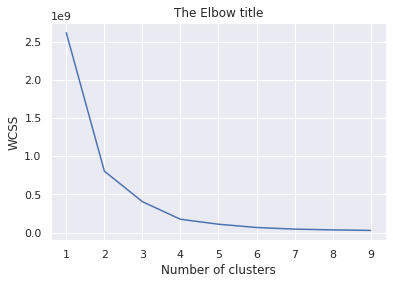

In [ ]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
plt.close()

In [ ]:
kmeans = KMeans(2)
# pred_clust = kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)

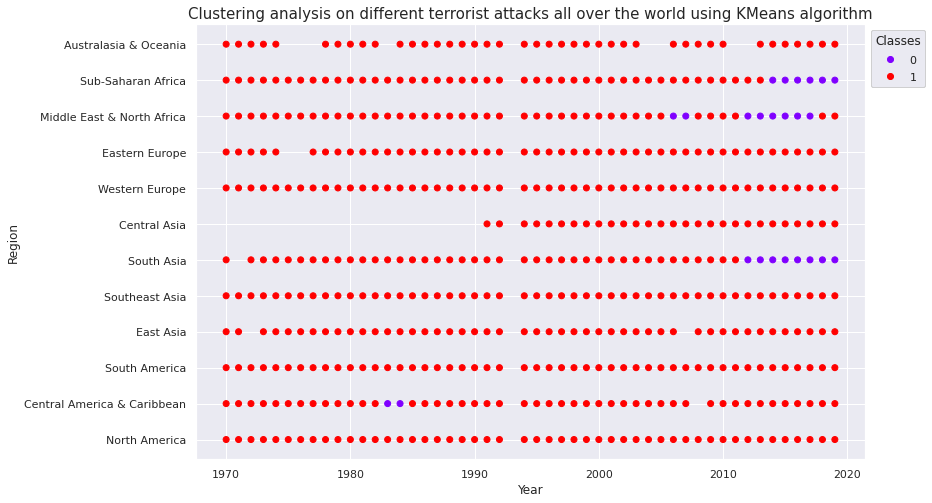

In [ ]:
data_with_clusters = a.copy()
data_with_clusters['Clusters'] = identified_clusters
fig, ax = plt.subplots(figsize=(12,8))
# plt.rc('axes', labelsize=15)

scatter = ax.scatter(data_with_clusters['iyear'],data_with_clusters['region'],c=data_with_clusters['Clusters'], cmap="rainbow")
legend = ax.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor = (1 , 1))
ax.add_artist(legend)

# plt.scatter(data_with_clusters['iyear'],data_with_clusters['region'],c=data_with_clusters['Clusters'])
plt.yticks(df_2.region.unique(), df_2.region_txt.unique())
plt.title("Clustering analysis on different terrorist attacks all over the world using KMeans algorithm", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Region")

# plt.legend(bbox_to_anchor = (1 , 1))
plt.show()
fig.savefig("clustering.jpg")
# plt.close()

**Total casualities of different regions since 1970 through 2020**

In [ ]:
b = df_2.groupby(["region_txt","region"])["nkill"].agg("sum").reset_index()
b.head()

,region_txt,region,nkill
0,Australasia & Oceania,12,203.0
1,Central America & Caribbean,2,28723.0
2,Central Asia,7,1084.0
3,East Asia,4,1154.0
4,Eastern Europe,9,7468.0


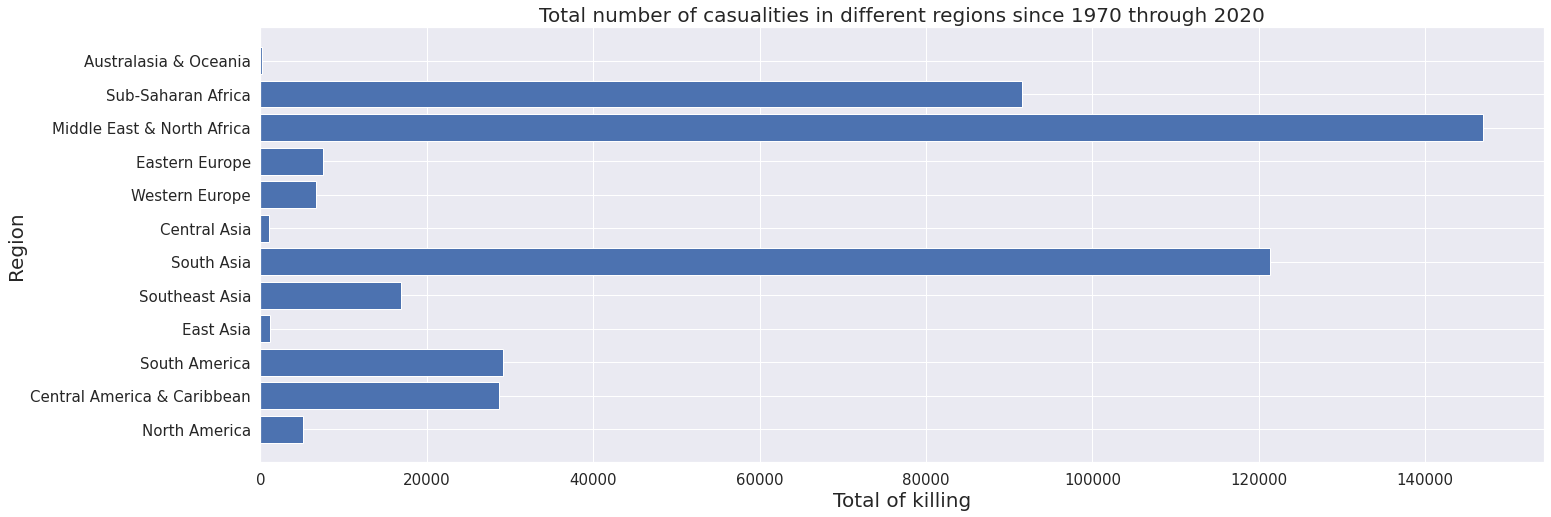

In [ ]:
fig = plt.figure(figsize=(23,8))
# plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20, titlesize=20)
# plt.xlim( right=max(a.nkill)+1000)
plt.barh(b.region,b.nkill)
plt.yticks(b.region, b.region_txt)
plt.title("Total number of casualities in different regions since 1970 through 2020")
plt.xlabel("Total of killing")
plt.ylabel("Region")
plt.grid("Off")
fig.savefig("bar_plot.jpg")
plt.show()

**Visualizing casualities in different regions**

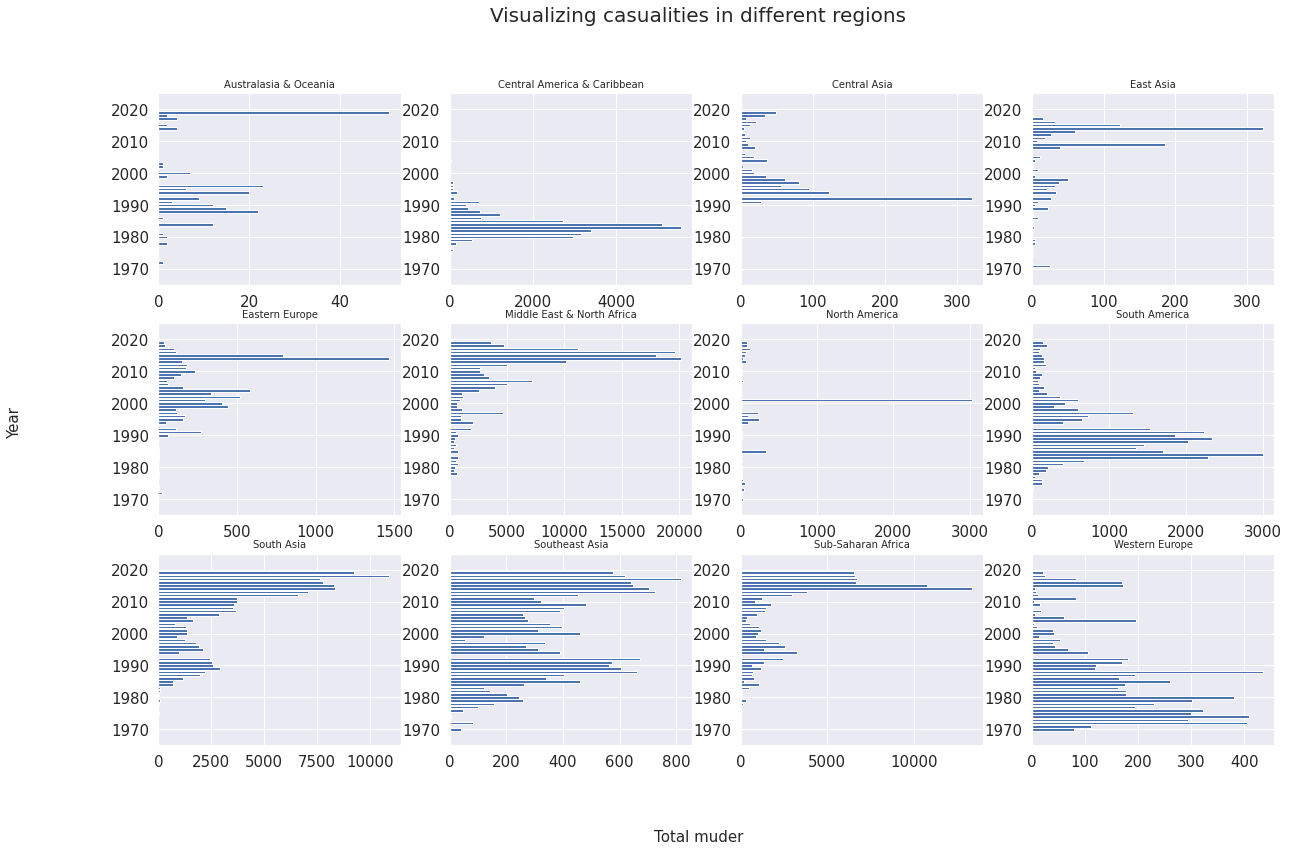

In [ ]:
# region = "Middle East & North Africa" #@param ['Australasia & Oceania', 'Central America & Caribbean','Central Asia', 'East Asia', 'Eastern Europe','Middle East & North Africa', 'North America', 'South America','South Asia', 'Southeast Asia', 'Sub-Saharan Africa','Western Europe']

region = a.region_txt.unique().tolist()
fig = plt.figure(figsize=(20,12))

fig.supxlabel("Total muder", fontsize=15)
fig.supylabel("Year", fontsize=15)
fig.suptitle("Visualizing casualities in different regions", fontsize=20)

for i in range(len(region)):
    ax = fig.add_subplot(3,4,i+1)
    c = a[a["region_txt"] == region[i]]
    c = c.groupby("iyear")["nkill"].sum().reset_index()
    ax.barh(c.iyear, c.nkill)
    ax.set_ylim(1965, 2025)
    ax.set_title("{}".format(region[i]), fontsize= 10)
    # ax.grid(True)

fig.savefig("region_based_killing_bar.jpg")
plt.show()
plt.close()

## Tracing the targeted people

**Target victims on terrorist attacks**

In [ ]:
t = df_2[["attacktype1_txt", "targtype1_txt", "targtype1"]].groupby(["attacktype1_txt", "targtype1_txt", "targtype1"]).agg(**{"target_count":("targtype1_txt","count")}).reset_index()
t.head()

,attacktype1_txt,targtype1_txt,targtype1,target_count
0,Armed Assault,Abortion Related,5,8
1,Armed Assault,Airports & Aircraft,6,114
2,Armed Assault,Business,1,2562
3,Armed Assault,Educational Institution,8,668
4,Armed Assault,Food or Water Supply,9,46


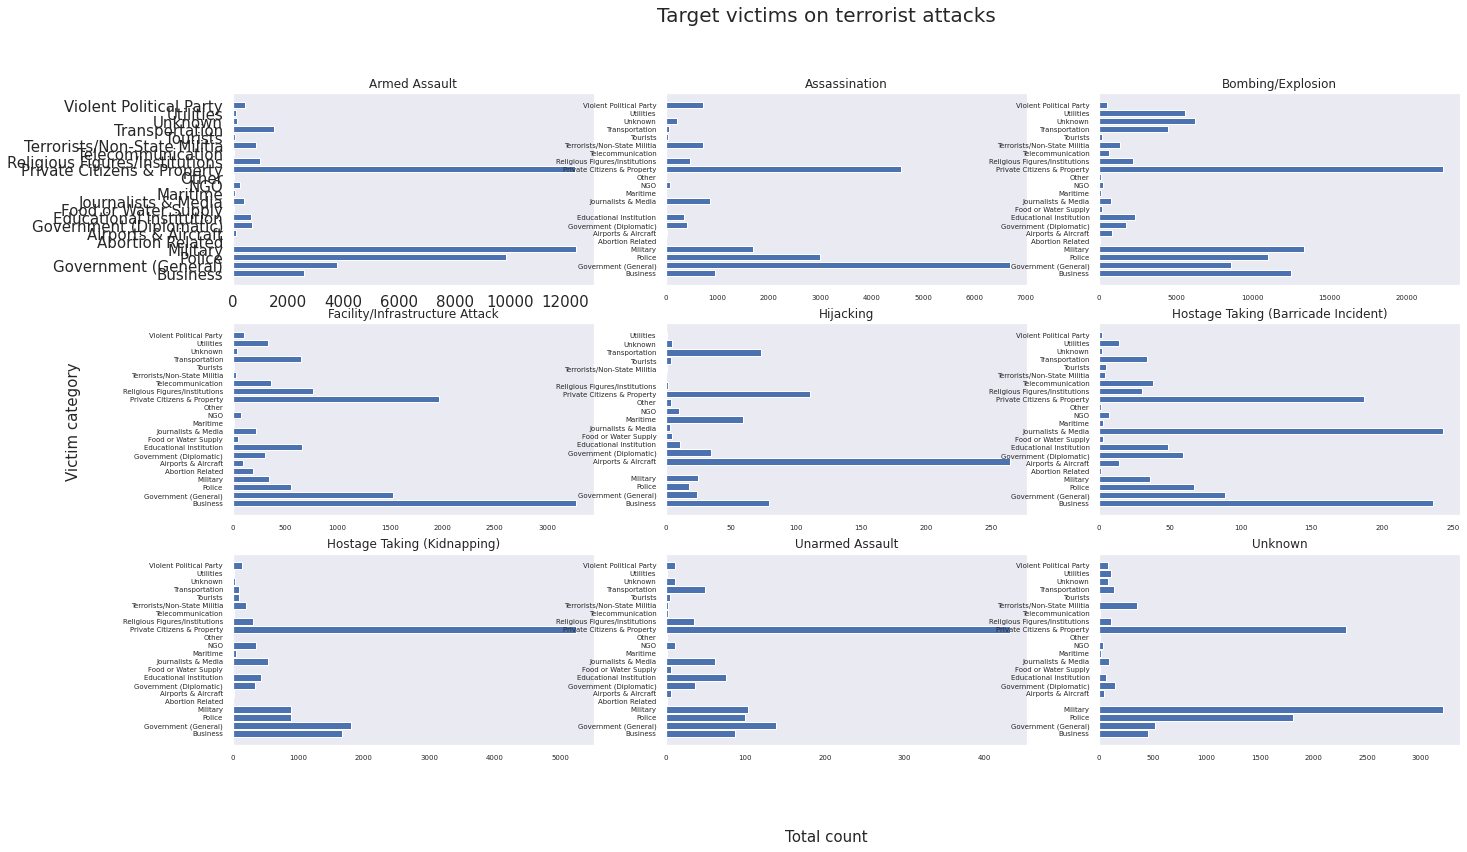

In [ ]:
attack = t.attacktype1_txt.unique().tolist()
fig = plt.figure(figsize=(22,12))

fig.supxlabel("Total count", fontsize=15)
fig.supylabel("Victim category", fontsize=15)
fig.suptitle("Target victims on terrorist attacks", fontsize=20)

for i in range(len(attack)):
    ax = fig.add_subplot(3,3,i+1)
    d = t[t["attacktype1_txt"] == attack[i]]
    plt.rc('ytick', labelsize=7)
    plt.rc('xtick', labelsize=7)
    ax.barh(d.targtype1, d.target_count)
    ax.set_yticks(d.targtype1, d.targtype1_txt)

    ax.set_title("{}".format(attack[i]), fontsize= 12)
    ax.grid(False)

fig.savefig("attack_vs_target.jpg")
plt.show()
plt.close()

**Weapon used on different attack type**

In [ ]:
w = df_2[["attacktype1_txt", "weaptype1_txt", "weaptype1"]].groupby(["attacktype1_txt", "weaptype1_txt", "weaptype1"]).agg(**{"weapon_count":("weaptype1_txt","count")}).reset_index()
w.head()

,attacktype1_txt,weaptype1_txt,weaptype1,weapon_count
0,Armed Assault,Chemical,2,2
1,Armed Assault,Explosives,6,2316
2,Armed Assault,Firearms,5,40805
3,Armed Assault,Incendiary,8,2451
4,Armed Assault,Melee,9,1687


In [ ]:
w["weaptype1_txt"] = w["weaptype1_txt"].replace(["Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"], "Vehicle_non_explosive")

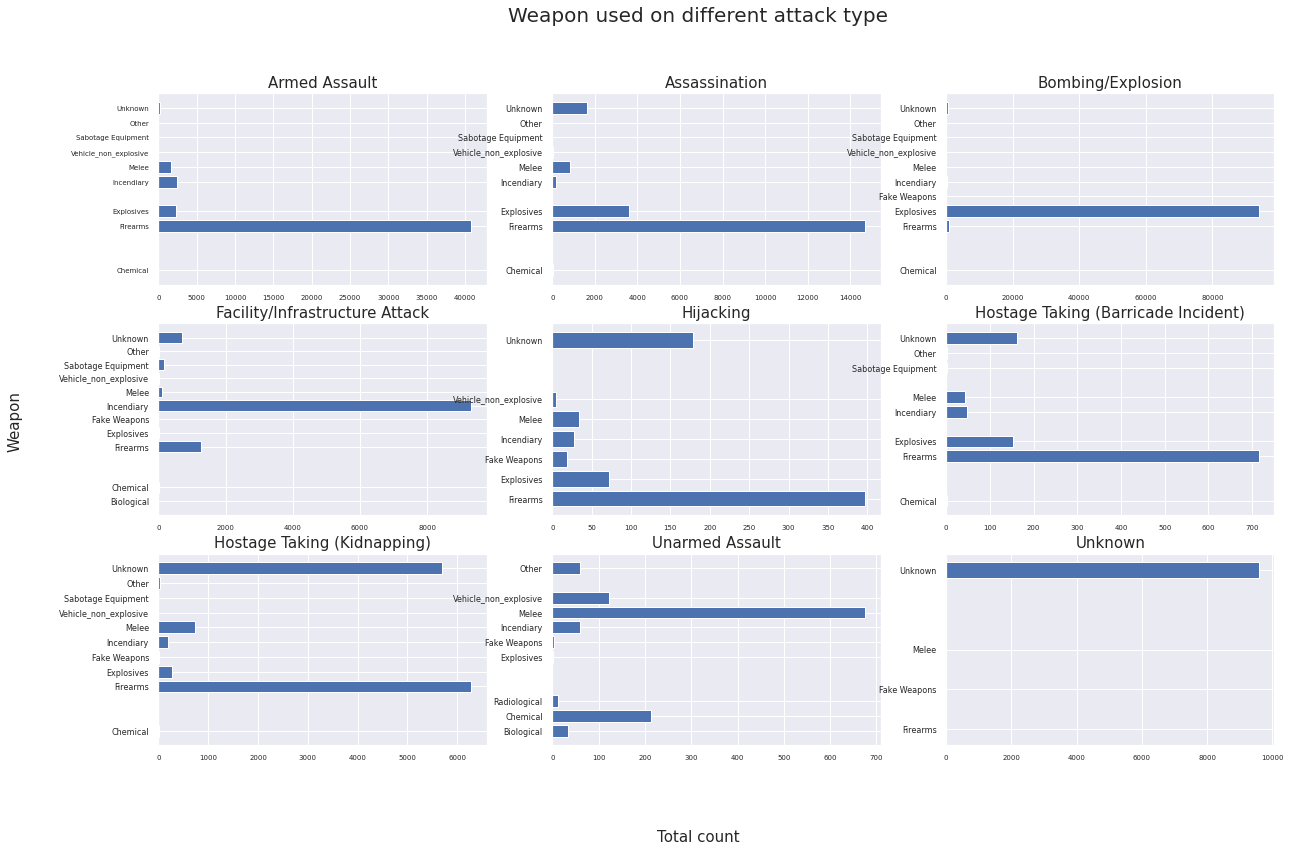

In [ ]:
attack = t.attacktype1_txt.unique().tolist()
fig = plt.figure(figsize=(20,12))

fig.supxlabel("Total count", fontsize=15)
fig.supylabel("Weapon", fontsize=15)
fig.suptitle("Weapon used on different attack type", fontsize=20)

for i in range(len(attack)):
    ax = fig.add_subplot(3,3,i+1)
    d = w[w["attacktype1_txt"] == attack[i]]
    plt.rc('ytick', labelsize=8)
    ax.barh(d.weaptype1, d.weapon_count)
    ax.set_yticks(d.weaptype1, d.weaptype1_txt)
    # ax.set_ylim(1970, 2030)
    ax.set_title("{}".format(attack[i]), fontsize= 15)
    # ax.grid(True)

fig.savefig("attack_vs_weapon.jpg")
plt.show()
plt.close()

## Parameters of terrorist attacks

**The scenario of different attacks all over the world**

In [ ]:
r_a = df_2[["attacktype1_txt", "region_txt", "attacktype1"]].groupby(["region_txt", "attacktype1_txt", "attacktype1"]).agg(**{"attack_count":("attacktype1_txt","count")}).reset_index()
r_a.head()

,region_txt,attacktype1_txt,attacktype1,attack_count
0,Australasia & Oceania,Armed Assault,2,55
1,Australasia & Oceania,Assassination,1,36
2,Australasia & Oceania,Bombing/Explosion,3,74
3,Australasia & Oceania,Facility/Infrastructure Attack,7,91
4,Australasia & Oceania,Hijacking,4,3


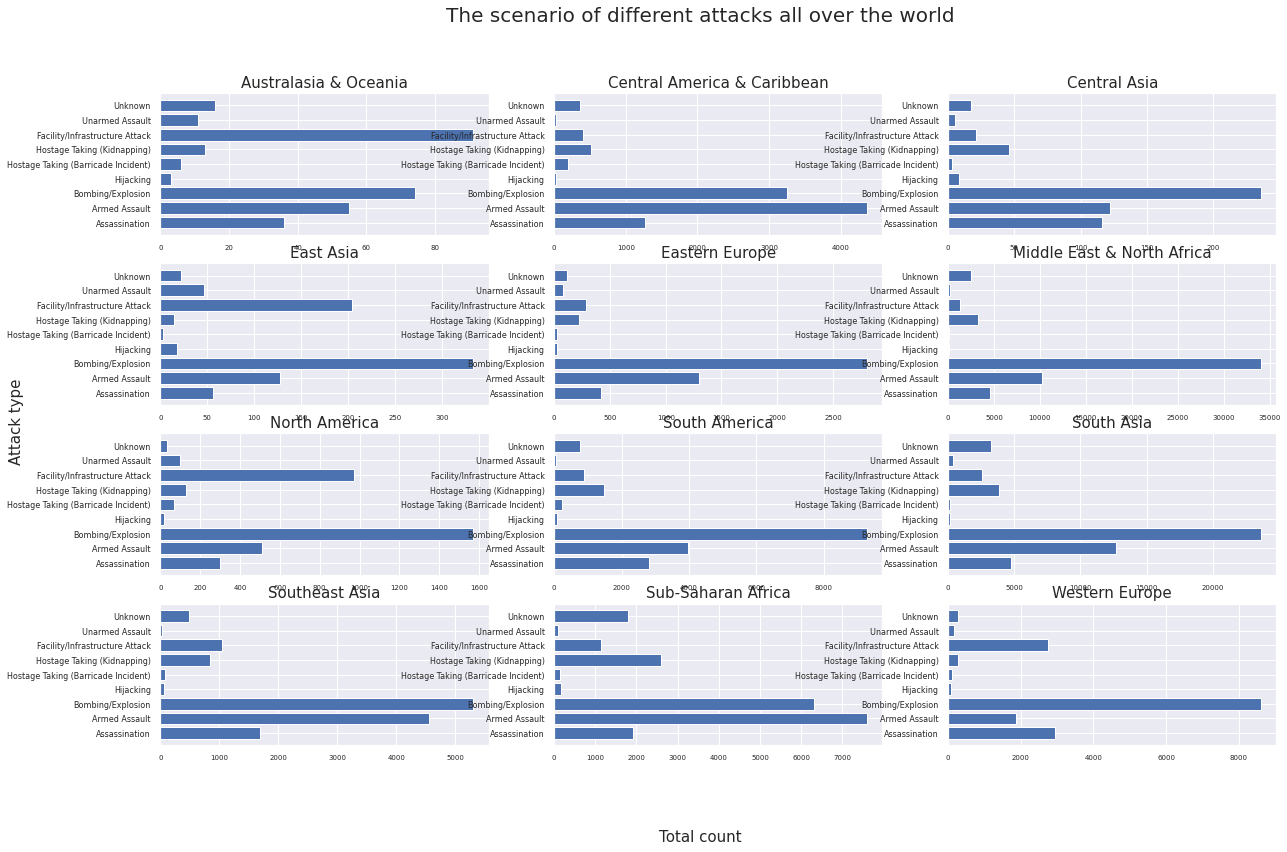

In [ ]:
region = r_a.region_txt.unique().tolist()
fig = plt.figure(figsize=(20,12))

fig.supxlabel("Total count", fontsize=15)
fig.supylabel("Attack type", fontsize=15)
fig.suptitle("The scenario of different attacks all over the world", fontsize=20)

for i in range(len(region)):
    ax = fig.add_subplot(4,3,i+1)
    e = r_a[r_a["region_txt"] == region[i]]
    plt.rc('ytick', labelsize=8)
    ax.barh(e.attacktype1, e.attack_count)
    ax.set_yticks(e.attacktype1, e.attacktype1_txt)
    ax.set_title("{}".format(region[i]), fontsize= 15)
    # ax.grid(True)

fig.savefig("region_vs_attack.jpg")
plt.show()
plt.close()

**Visualizing the count of weapon usage in individual terrorist attacks**

In [ ]:
r_t = df_2[["region_txt", "targtype1_txt",  "targtype1"]].groupby(["region_txt", "targtype1_txt", "targtype1"]).agg(**{"target_count":("targtype1_txt","count")}).reset_index()
r_t.head()

,region_txt,targtype1_txt,targtype1,target_count
0,Australasia & Oceania,Airports & Aircraft,6,7
1,Australasia & Oceania,Business,1,66
2,Australasia & Oceania,Educational Institution,8,8
3,Australasia & Oceania,Food or Water Supply,9,1
4,Australasia & Oceania,Government (Diplomatic),7,30


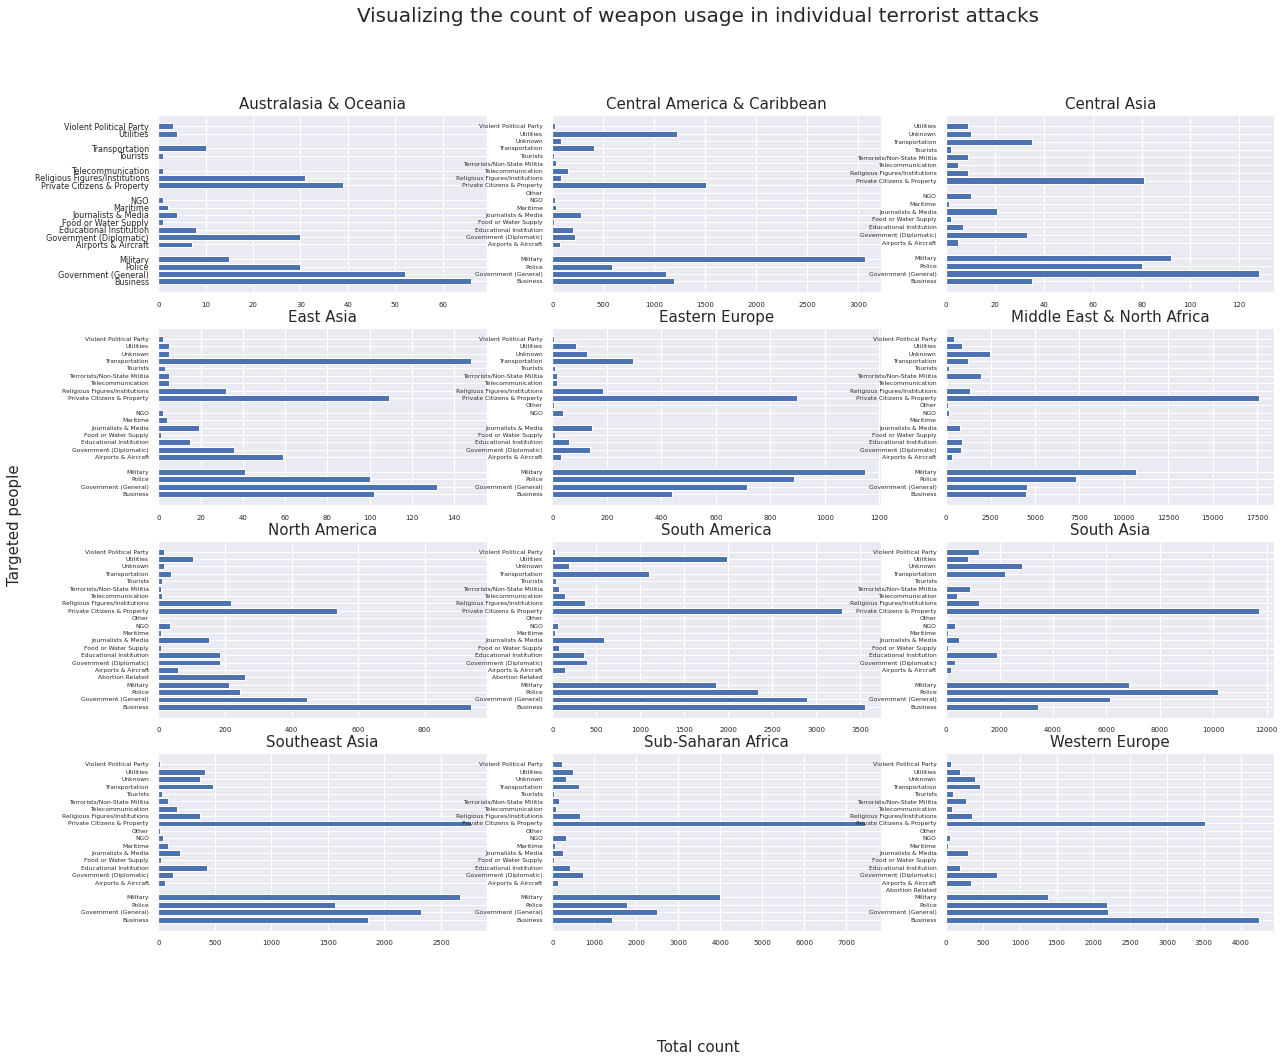

In [ ]:
region = r_t.region_txt.unique().tolist()
fig = plt.figure(figsize=(20,15))

fig.supxlabel("Total count", fontsize=15)
fig.supylabel("Targeted people", fontsize=15)
fig.suptitle("Visualizing the count of weapon usage in individual terrorist attacks", fontsize=20)

for i in range(len(region)):
    ax = fig.add_subplot(4,3,i+1)
    f = r_t[r_t["region_txt"] == region[i]]
    plt.rc('ytick', labelsize=6)
    ax.barh(f.targtype1, f.target_count)
    ax.set_yticks(f.targtype1, f.targtype1_txt)
    ax.set_title("{}".format(region[i]), fontsize= 15)
    # ax.grid(True)

fig.savefig("region_vs_target_people.jpg")
plt.show()
plt.close()

**Geographical Analysis**

In [ ]:
import plotly.offline as po
import plotly.graph_objs as pg

In [ ]:
ge = df_2[["region_txt", "country_txt", "nkill"]].groupby(["region_txt", "country_txt"]).agg(**{"total_kill":("nkill","sum")}).reset_index()
ge.head()

,region_txt,country_txt,total_kill
0,Australasia & Oceania,Australia,25.0
1,Australasia & Oceania,Fiji,8.0
2,Australasia & Oceania,French Polynesia,0.0
3,Australasia & Oceania,New Caledonia,35.0
4,Australasia & Oceania,New Hebrides,0.0


In [ ]:
data = []
for i in range(ge.shape[0]):
    for j in range(b.shape[0]):
        if ge.region_txt[i] == b.region_txt[j]:
            data.append(round((ge.total_kill[i] * 100) / b.nkill[j], 2))

ge["Percentage_of_murder(%)"] = data

In [ ]:
ge.head()

,region_txt,country_txt,total_kill,Percentage_of_murder(%)
0,Australasia & Oceania,Australia,25.0,12.32
1,Australasia & Oceania,Fiji,8.0,3.94
2,Australasia & Oceania,French Polynesia,0.0,0.00
3,Australasia & Oceania,New Caledonia,35.0,17.24
4,Australasia & Oceania,New Hebrides,0.0,0.00


In [ ]:
data = dict(type="choropleth",
            locations= ge["country_txt"],
            locationmode = "country names",
            z = ge["Percentage_of_murder(%)"],
            text = ge["country_txt"],
            colorbar = {"title":"Percentage"})

In [ ]:
layout = dict(title="Country-total murder projection since 1970 to 2020",
              geo = dict(projection={"type":"hammer"},
                         showlakes = True,
                         lakecolor = "rgb(0,191,255)"))

x = pg.Figure(data = [data], layout = layout)

po.iplot(x)